In [1]:
### Library Imports
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
### Load in Stock Data
def import_stock_data(tickers, start_date):
    data = pd.DataFrame()
    if isinstance(tickers, str):
        tickers = [tickers]
        
    for ticker in tickers:
        data[ticker] = yf.download(ticker, start=start_date)['Adj Close']
        
    # Reset index to make headings in the same row
    data.reset_index(inplace=True)
    # Convert values in date col to dt
    data['Date'] = pd.to_datetime(data['Date'])

    return data

# Function Call
forex_pairs = ['EURUSD=X', 'GBPUSD=X', 'JPYUSD=X', 'AUDUSD=X']
start_date = '2022-01-01'
forex_data = import_stock_data(forex_pairs, start_date)
forex_data.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,EURUSD=X,GBPUSD=X,JPYUSD=X,AUDUSD=X
635,2024-06-10,1.077888,1.272945,0.006376,0.658271
636,2024-06-11,1.076426,1.272637,0.006368,0.660895
637,2024-06-12,1.074033,1.274048,0.006365,0.660770
638,2024-06-13,1.081315,1.279623,0.006378,0.666290
639,2024-06-14,1.074114,1.275331,NaN,0.663200


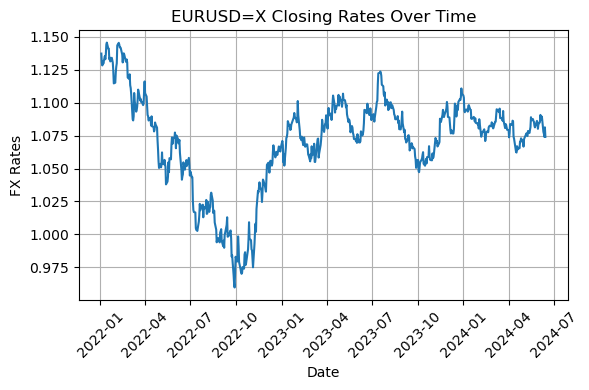

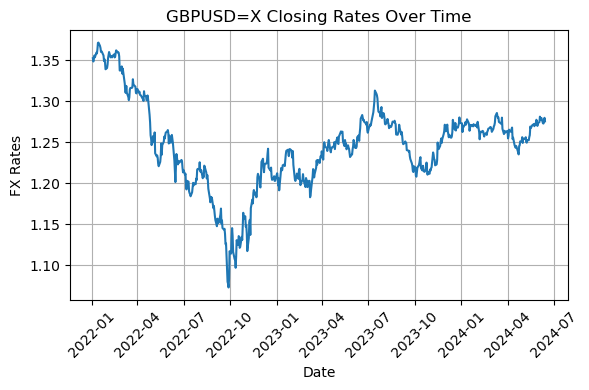

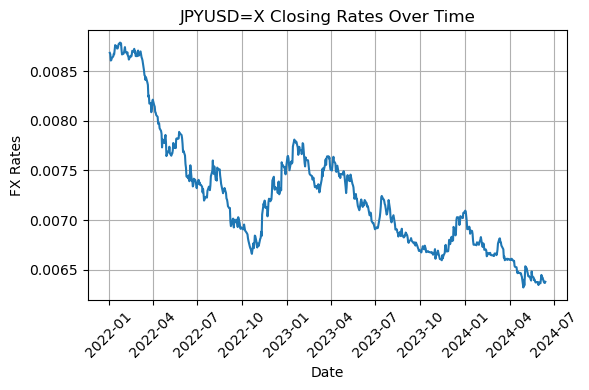

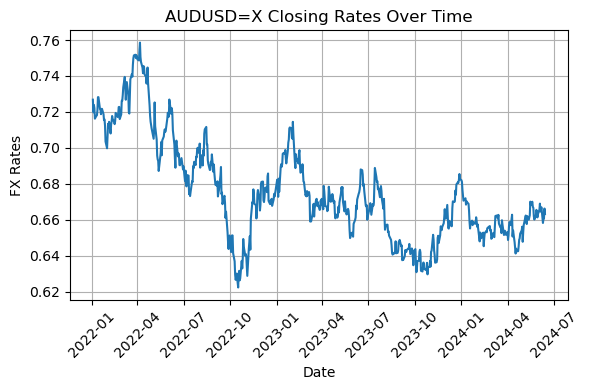

In [3]:
### Plot FX Data
def plot_forex(df, forex_pairs):
    # Create Loop to Plot Each Individual FX Pair
    for pair in forex_pairs:
        plt.figure(figsize = (6, 4))

        plt.plot(df['Date'], df[pair]) # Need to adjust to spit out multiple graphs for each ticker
        plt.title(pair + ' Closing Rates Over Time')
        plt.xlabel('Date')
        plt.ylabel('FX Rates')

        plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
        plt.grid(True)
        plt.tight_layout()

    return plt.show()

plot_forex(forex_data, forex_pairs)